In [1]:
import pandas as pd
df = pd.read_excel('Training_Data.xlsx')
df.head(5)
df.head(5)

Sentence  \
0  pcp sent an urgent referral to desert west sur...   
1  members grievance is nazets about sales agent ...   
2  paid amounts provided contirmation ach25009133...   
3  completed agent investigation unit request for...   
4  calling about claim is upset that she was not ...   

                                            Tag  
0  Organization Determination / Reconsideration  
1                                     Marketing  
2                              Customer Service  
3                                     Marketing  
4                              Customer Service

In [2]:
from io import StringIO
col = ['Tag', 'Sentence']
df = df[col]
df = df[pd.notnull(df['Sentence'])]

In [3]:
df.columns = ['Tag', 'Sentence']
df['category_id'] = df['Tag'].factorize()[0]
category_id_df = df[['Tag', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Tag']].values)
df.head()

Tag  \
0  Organization Determination / Reconsideration   
1                                     Marketing   
2                              Customer Service   
3                                     Marketing   
4                              Customer Service   

                                            Sentence  category_id  
0  pcp sent an urgent referral to desert west sur...            0  
1  members grievance is nazets about sales agent ...            1  
2  paid amounts provided contirmation ach25009133...            2  
3  completed agent investigation unit request for...            1  
4  calling about claim is upset that she was not ...            2

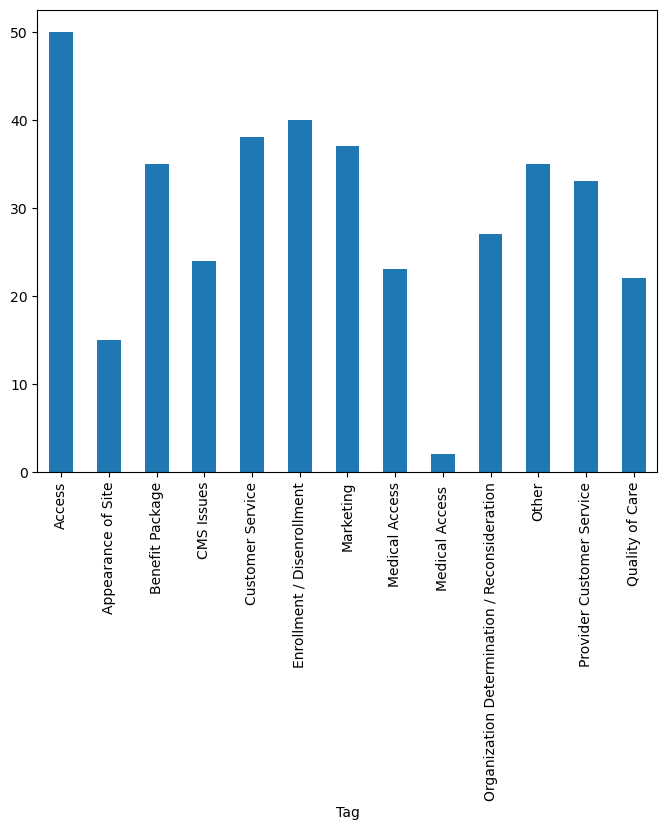

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Tag').Sentence.count().plot.bar(ylim=0)
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Sentence).toarray()
labels = df.category_id
features.shape

C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(381, 803)

In [8]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Tag, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Tag))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Access':
  . Most correlated unigrams:
. par
. pfp
  . Most correlated bigrams:
. qaa details
. unsanitary provider
# 'Appearance of Site':
  . Most correlated unigrams:
. facility
. rehab
  . Most correlated bigrams:
. yes provider
. unsanitary yes
# 'Benefit Package':
  . Most correlated unigrams:
. copay
. otc
  . Most correlated bigrams:
. actions apologized
. member like
# 'CMS Issues':
  . Most correlated unigrams:
. giveback
. ssa
  . Most correlated bigrams:
. payment method
. contact ssa
# 'Customer Service':
  . Most correlated unigrams:
. record
. grieving
  . Most correlated bigrams:
. customer service
. member grieving
# 'Enrollment / Disenrollment':
  . Most correlated unigrams:
. address
. reinstated
  . Most correlated bigrams:
. reinstated policy
. plan cancelled
# 'Marketing':
  . Most correlated unigrams:
. agent
. sales
  . Most correlated bigrams:
. sales agent
. grievance sales
# 'Medical Access':
  . Most correlated unigrams:
. drugs
. nal
  . Most correlated 

C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Tag'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [11]:
print(clf.predict(count_vect.transform(["paid amounts provided contirmation ach250091335 provided terms and conditions advised the member that the payment is processed and to allow business days for the payment to reflect on their statement processed date the members grievance is about humana customer service we oo jan business area retail contact center rcc explain the members grievance in detail there was a time experienced a time wherein they t 121706 a a marcclo called to make a payment but the advocate did nt notice or call them back that the payment on that call did nt go through member express dissatisfaction additional actions apologizedadv we value your and your grievance on your customer service experience will be shared and reviewed any findings are confidential risper calling to pay advance of the premium callers marcelo expected outcome caller is expecting to make a payment i"])))

['Customer Service']


C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


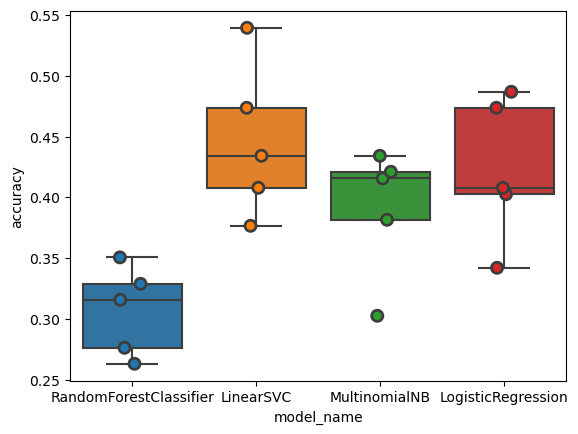

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [13]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.446377
LogisticRegression        0.422625
MultinomialNB             0.391012
RandomForestClassifier    0.306972
Name: accuracy, dtype: float64

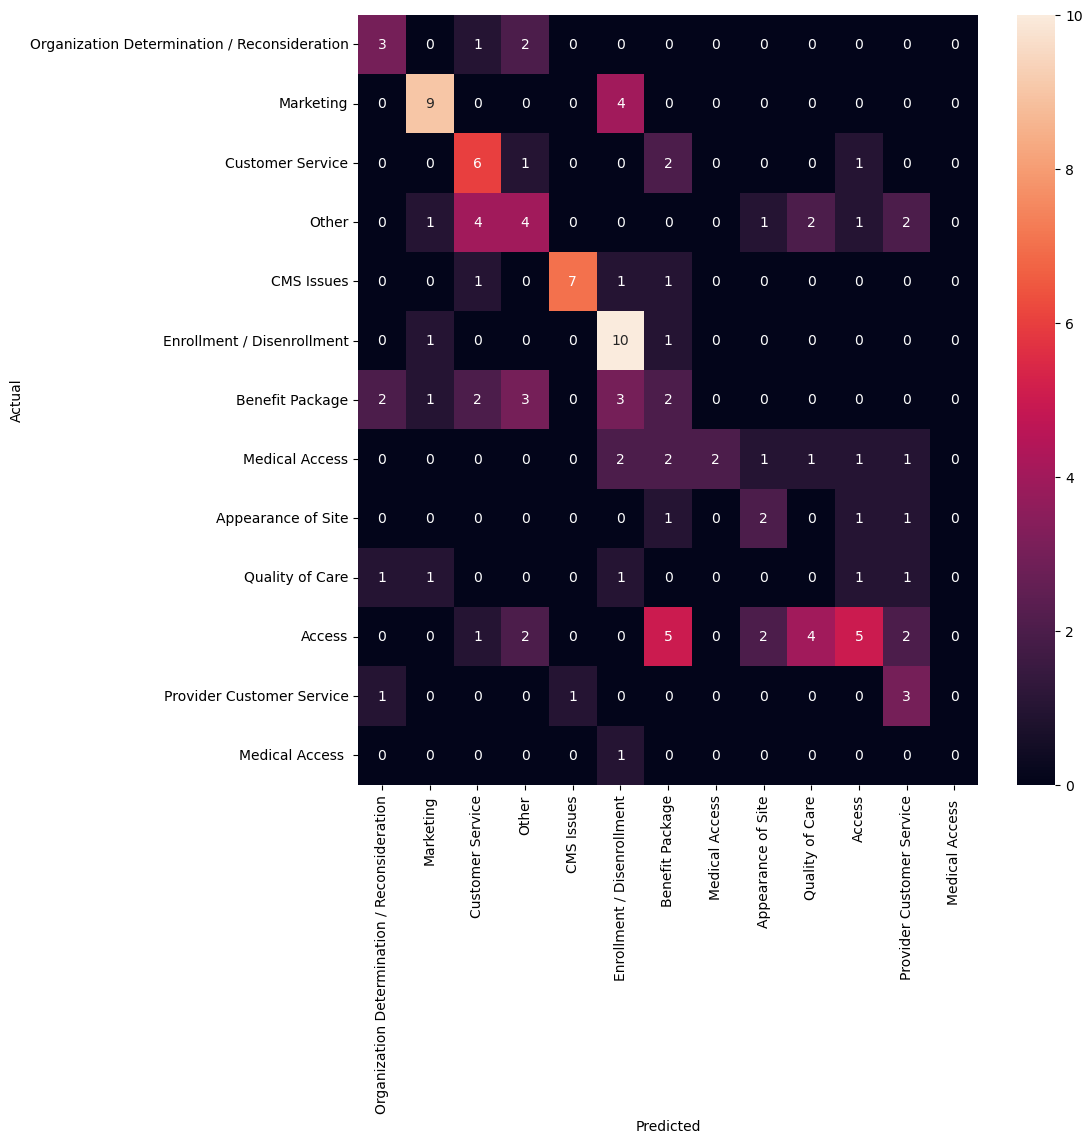

In [14]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Tag.values, yticklabels=category_id_df.Tag.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Tag', 'Sentence']])
      print('')

In [16]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Access':
  . Top unigrams:
       . apologized
       . need
  . Top bigrams:
       . paid member
       . unsanitary provider
# 'Appearance of Site':
  . Top unigrams:
       . dental
       . facility
  . Top bigrams:
       . unsanitary yes
       . yes provider
# 'Benefit Package':
  . Top unigrams:
       . otc
       . copay
  . Top bigrams:
       . actions apologized
       . member like
# 'CMS Issues':
  . Top unigrams:
       . ssa
       . giveback
  . Top bigrams:
       . auth required
       . contact ssa
# 'Customer Service':
  . Top unigrams:
       . record
       . called
  . Top bigrams:
       . member grieving
       . united states
# 'Enrollment / Disenrollment':
  . Top unigrams:
       . plan
       . address
  . Top bigrams:
       . plan cancelled
       . social security
# 'Marketing':
  . Top unigrams:
       . plan
       . agent
  . Top bigrams:
       . sales allegations
       . grievance sales
# 'Medical Access':
  . Top unigrams:
       . try
     

C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Tag'].unique()))

                                              precision    recall  f1-score   support

Organization Determination / Reconsideration       0.43      0.50      0.46         6
                                   Marketing       0.69      0.69      0.69        13
                            Customer Service       0.40      0.60      0.48        10
                                       Other       0.33      0.27      0.30        15
                                  CMS Issues       0.88      0.70      0.78        10
                  Enrollment / Disenrollment       0.45      0.83      0.59        12
                             Benefit Package       0.14      0.15      0.15        13
                              Medical Access       1.00      0.20      0.33        10
                          Appearance of Site       0.33      0.40      0.36         5
                             Quality of Care       0.00      0.00      0.00         5
                                      Access       0.

C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KPA2877\.conda\envs\envl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
y_pred = model.predict(X_train)

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_train, y_pred, target_names=df['Tag'].unique()))

                                              precision    recall  f1-score   support

Organization Determination / Reconsideration       1.00      1.00      1.00        21
                                   Marketing       1.00      0.96      0.98        24
                            Customer Service       0.93      0.96      0.95        28
                                       Other       1.00      0.95      0.97        20
                                  CMS Issues       1.00      1.00      1.00        14
                  Enrollment / Disenrollment       1.00      0.96      0.98        28
                             Benefit Package       0.96      1.00      0.98        22
                              Medical Access       0.93      1.00      0.96        13
                          Appearance of Site       1.00      1.00      1.00        10
                             Quality of Care       0.94      0.94      0.94        17
                                      Access       0.